In [120]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv('rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [5]:
df.shape

(2020, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [7]:
df1 = df.drop(['nav-link','description','carport','building_area'], axis='columns')
df1.head()

,price,listing-location,bed,bath,surface_area
0,"Rp 1,79 Miliar","Ngaglik, Sleman",3.0,3.0,120 m²
1,Rp 170 Juta,"Jombor, Sleman",3.0,2.0,102 m²
2,Rp 695 Juta,"Berbah, Sleman",2.0,2.0,100 m²
3,Rp 560 Juta,"Prambanan, Sleman",3.0,1.0,109 m²
4,Rp 200 Juta,"Moyudan, Sleman",2.0,1.0,60 m²


In [8]:
def clean_price(price):
    price = re.sub(r',','.',price)
    price = re.sub(r'Rp\s','',price)
    if "Miliar" in price:
        price = re.sub(r'\sMiliar','',price)
        price = float(price)*1000000000
    elif "Juta" in price:
        price = re.sub(r'\sJuta','',price)
        price = float(price)*1000000
    return price

df1['price'] = df1['price'].apply(clean_price)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   float64
 1   listing-location  2020 non-null   object 
 2   bed               2001 non-null   float64
 3   bath              1999 non-null   float64
 4   surface_area      2019 non-null   object 
dtypes: float64(3), object(2)
memory usage: 79.0+ KB


In [9]:
def clean_surface_area(surface_area):
    surface_area = str(surface_area).split()[0]
    if "-" in surface_area:
        nums = [float(x) for x in surface_area.split("-")]
        return sum(nums)/len(nums)
    return float(surface_area)

df1['surface_area'] = df1['surface_area'].apply(clean_surface_area)

In [10]:
df1['location'] = [x.split(',')[-1] for x in df['listing-location']]

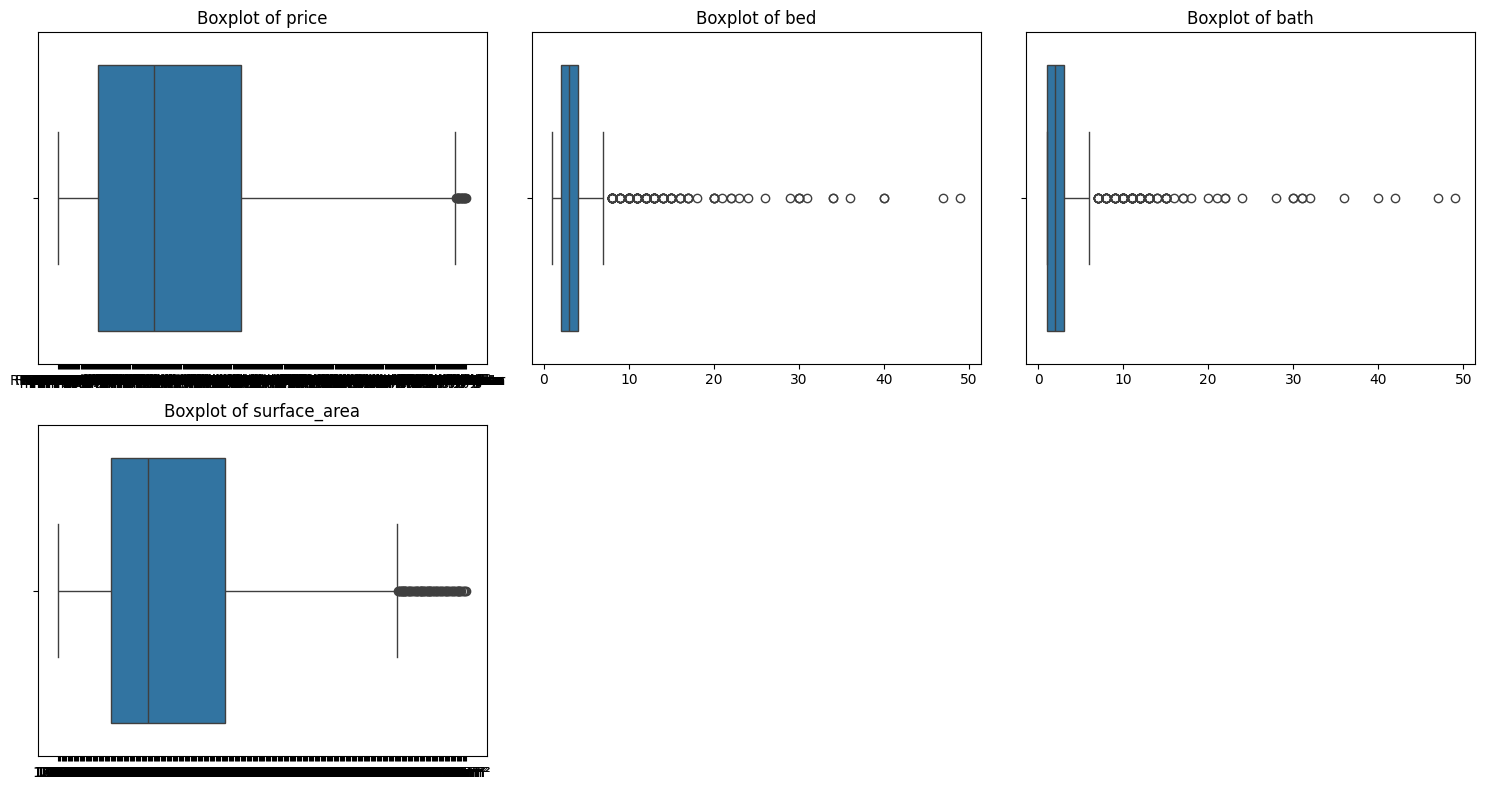

In [11]:
numerical_columns = df1.select_dtypes(exclude=['object']).columns.to_list()

plt.figure(figsize=(15,8))
for i,x in enumerate(numerical_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, x = x)
    plt.title(f"Boxplot of {x}")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()

In [12]:
print("Jumlah missing values:")
print(df1.isnull().sum())

Jumlah missing values:
price                0
listing-location     0
bed                 19
bath                21
surface_area         1
location             0
dtype: int64


In [13]:
df1['bed'] = df1['bed'].replace('', np.nan).astype(float)
df1['bed'].fillna(df1['bed'].median(), inplace=True)

In [14]:
df1['bath'] = df1['bath'].replace('', np.nan).astype(float)
df1['bath'].fillna(df1['bath'].median(), inplace=True)

In [15]:
df1['surface_area'] = df1['surface_area'].replace('', np.nan).astype(float)
df1['surface_area'].fillna(df1['surface_area'].median(), inplace=True)

In [16]:
print("Jumlah missing values:")
print(df1.isnull().sum())

Jumlah missing values:
price               0
listing-location    0
bed                 0
bath                0
surface_area        0
location            0
dtype: int64


In [17]:
df1['price'] = df1['price'].astype('int64')
df1['bed'] = df1['bed'].astype('int64')
df1['bath'] = df1['bath'].astype('int64')
df1['surface_area'] = df1['surface_area'].astype('float64')
df1['location'] = df1['location'].str.strip()

In [18]:
print("\nPerbandingan statistik antara df dan df1:")
print("df:")
print(df[['bed', 'bath']].describe())

print("\ndf1:")
print(df1[['bed', 'bath']].describe())



Perbandingan statistik antara df dan df1:
df:
               bed         bath
count  2001.000000  1999.000000
mean      3.969015     2.941971
std       3.671654     3.517671
min       1.000000     1.000000
25%       2.000000     1.000000
50%       3.000000     2.000000
75%       4.000000     3.000000
max      49.000000    49.000000

df1:
               bed         bath
count  2020.000000  2020.000000
mean      3.959901     2.932178
std       3.655534     3.500634
min       1.000000     1.000000
25%       2.000000     1.000000
50%       3.000000     2.000000
75%       4.000000     3.000000
max      49.000000    49.000000


In [19]:
df1.head()

,price,listing-location,bed,bath,surface_area,location
0,1790000000,"Ngaglik, Sleman",3,3,120.0,Sleman
1,170000000,"Jombor, Sleman",3,2,102.0,Sleman
2,695000000,"Berbah, Sleman",2,2,100.0,Sleman
3,560000000,"Prambanan, Sleman",3,1,109.0,Sleman
4,200000000,"Moyudan, Sleman",2,1,60.0,Sleman


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   int64  
 1   listing-location  2020 non-null   object 
 2   bed               2020 non-null   int64  
 3   bath              2020 non-null   int64  
 4   surface_area      2020 non-null   float64
 5   location          2020 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 94.8+ KB


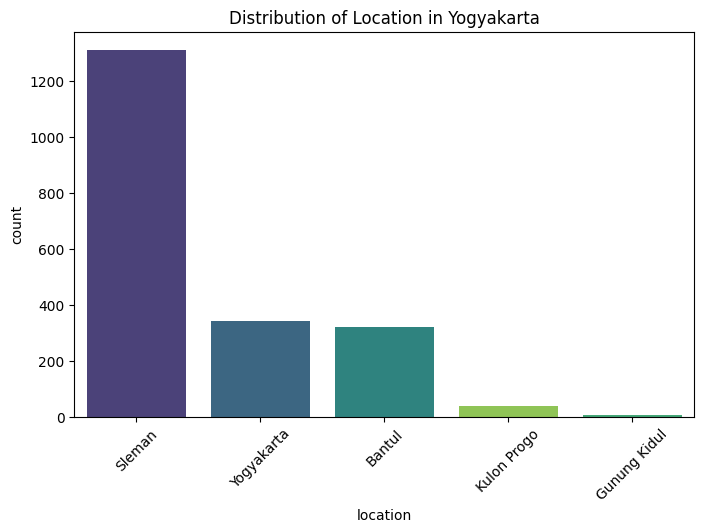

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='location', hue='location', order=df1['location'].value_counts().index, palette="viridis", legend=False)
plt.title("Distribution of Location in Yogyakarta")
plt.xticks(rotation=45)
plt.show()

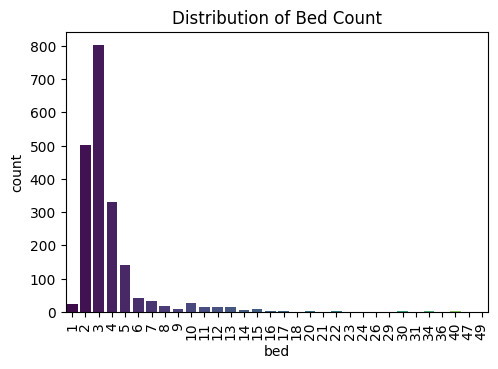

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df1, x='bed', hue='bed', palette="viridis", legend=False )
plt.title("Distribution of Bed Count")
plt.xticks(rotation=90)

plt.show()


In [23]:
df_bed_count = df1['bed'].value_counts().reset_index()
df_bed_count.columns = ['bed', 'count']
df_bed_count

,bed,count
0,3,802
1,2,502
2,4,332
3,5,140
4,6,42
5,7,34
6,10,26
7,1,23
8,8,19
9,12,16


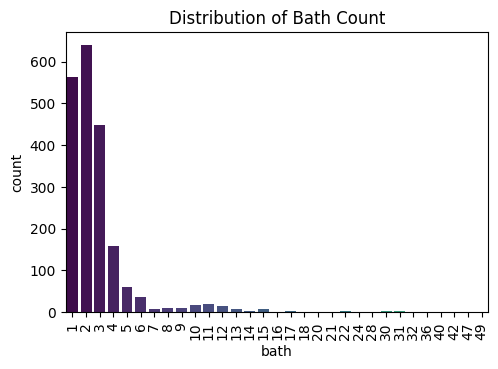

In [24]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df1, x='bath', hue='bath', palette="viridis", legend=False )
plt.title("Distribution of Bath Count")
plt.xticks(rotation=90)

plt.show()

In [25]:
df_bed_count = df1['bath'].value_counts().reset_index()
df_bed_count.columns = ['bath', 'count']
df_bed_count

,bath,count
0,2,639
1,1,563
2,3,449
3,4,159
4,5,59
5,6,36
6,11,19
7,10,17
8,12,14
9,8,10


In [26]:
df1.to_csv('cleaned.csv', index=False)

In [27]:
df2 = df1.copy()
df2['price_per_surface'] = df2['price'] / df2['surface_area']
df2.head(20)

,price,listing-location,bed,bath,surface_area,location,price_per_surface
0,1790000000,"Ngaglik, Sleman",3,3,120.0,Sleman,1.491667e+07
1,170000000,"Jombor, Sleman",3,2,102.0,Sleman,1.666667e+06
2,695000000,"Berbah, Sleman",2,2,100.0,Sleman,6.950000e+06
3,560000000,"Prambanan, Sleman",3,1,109.0,Sleman,5.137615e+06
4,200000000,"Moyudan, Sleman",2,1,60.0,Sleman,3.333333e+06
5,1470000000,"Depok, Sleman",5,3,125.0,Sleman,1.176000e+07
6,560000000,"Prambanan, Sleman",3,1,109.0,Sleman,5.137615e+06
7,2100000000,"Gamping, Sleman",11,11,206.0,Sleman,1.019417e+07
8,1600000000,"Ngaglik, Sleman",5,4,300.0,Sleman,5.333333e+06
9,2400000000,"Kaliurang, Yogyakarta",3,3,403.0,Yogyakarta,5.955335e+06


In [28]:
df2.to_csv('testpricepersurface.csv', index=False)

In [29]:
df2.price_per_surface.describe()

count    2.020000e+03
mean     1.034385e+07
std      2.819621e+07
min      2.527988e+03
25%      5.714286e+06
50%      8.213076e+06
75%      1.283422e+07
max      1.250000e+09
Name: price_per_surface, dtype: float64

In [30]:
df2.shape

(2020, 7)

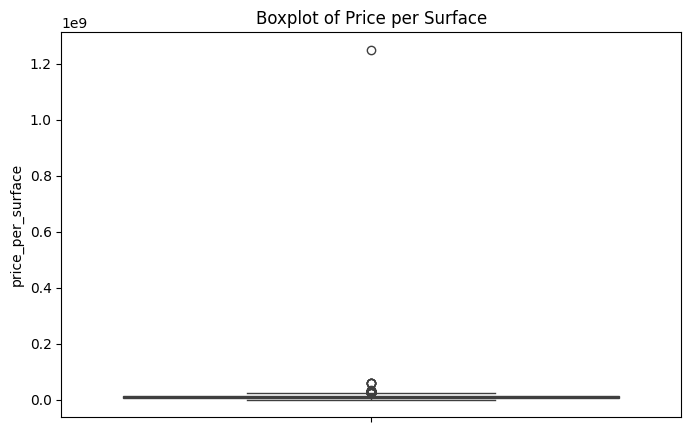

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df2, y='price_per_surface')
plt.title("Boxplot of Price per Surface")
plt.show()

In [32]:
Q1 = df2['price_per_surface'].quantile(0.25)
Q3 = df2['price_per_surface'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df2[(df2['price_per_surface'] < lower_bound) | (df2['price_per_surface'] > upper_bound)]
print(f"Jumlah outlier sebelum filtering: {outliers.shape[0]}")

Jumlah outlier sebelum filtering: 43


In [33]:
def remove_pps_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_surface)
        st = np.std(subdf.price_per_surface)
        reduced_df = subdf[(subdf.price_per_surface>(m-st)) & (subdf.price_per_surface<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df3 = remove_pps_outliners(df2)
df3.shape

(1502, 7)

In [34]:
df3['price_per_surface'].describe()

count    1.502000e+03
mean     8.651678e+06
std      3.151071e+06
min      2.800000e+06
25%      6.022659e+06
50%      7.943925e+06
75%      1.098566e+07
max      1.897059e+07
Name: price_per_surface, dtype: float64

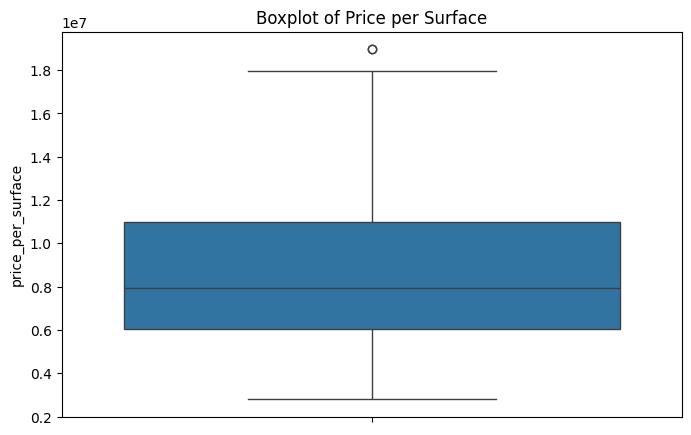

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df3, y='price_per_surface')
plt.title("Boxplot of Price per Surface")
plt.show()


In [36]:
Q1 = df3['price_per_surface'].quantile(0.25)
Q3 = df3['price_per_surface'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df3[(df3['price_per_surface'] < lower_bound) | (df3['price_per_surface'] > upper_bound)]
print(f"Jumlah outlier setelah filtering: {outliers.shape[0]}")


Jumlah outlier setelah filtering: 2


In [37]:
df3.to_csv('afterremoveppsoutliners.csv', index=False)

In [38]:
def plot_scatter_chart(df, location):
    bed2 = df[(df.location==location)&(df.bed==2)]
    bed3 = df[(df.location==location)&(df.bed==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.surface_area,bed2.price_per_surface,color='blue',label='2 BED',s=50)
    plt.scatter(bed3.surface_area,bed3.price_per_surface,marker='+',color='green',label='3 BED',s=50)
    plt.xlabel('Total Surface Area')
    plt.ylabel('Price Per Surface Feet')
    plt.title(location)
    plt.legend()
    


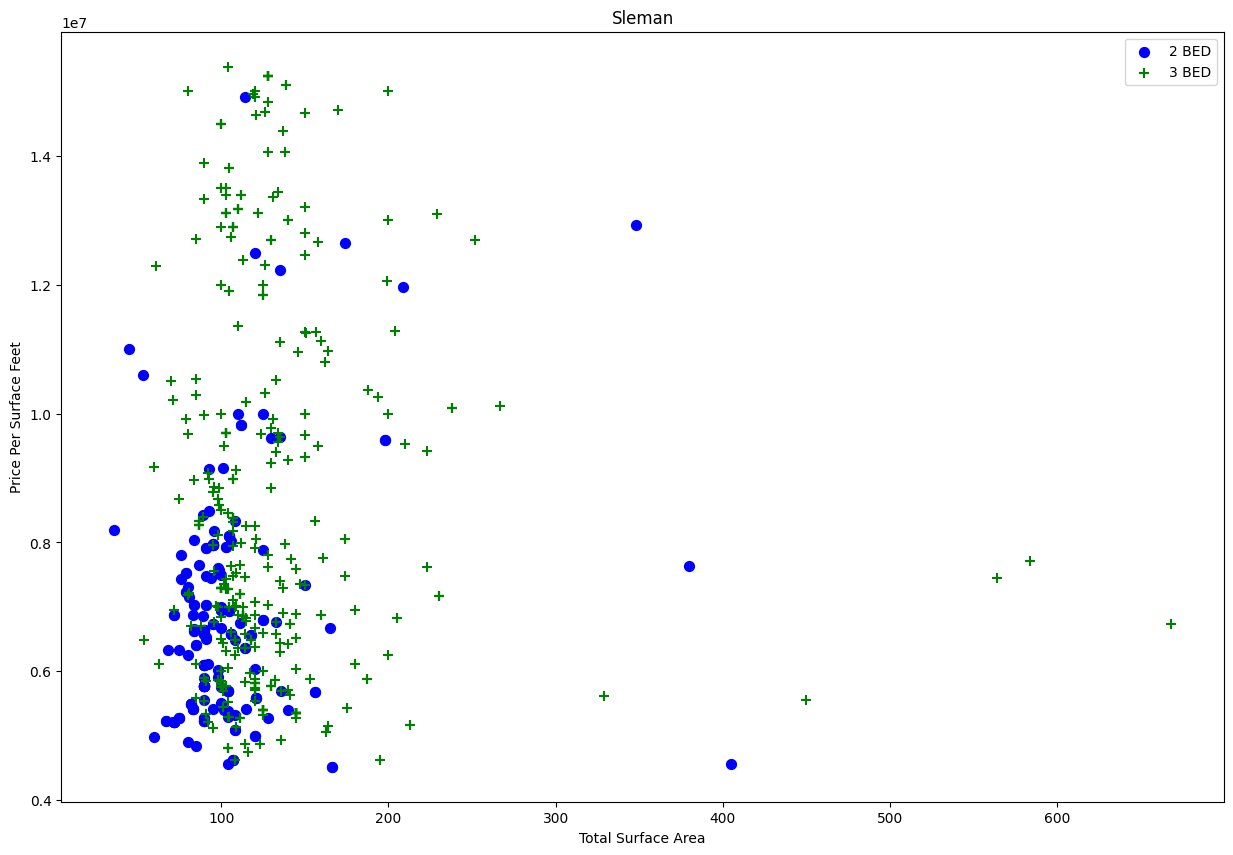

In [39]:
plot_scatter_chart(df3,'Sleman')

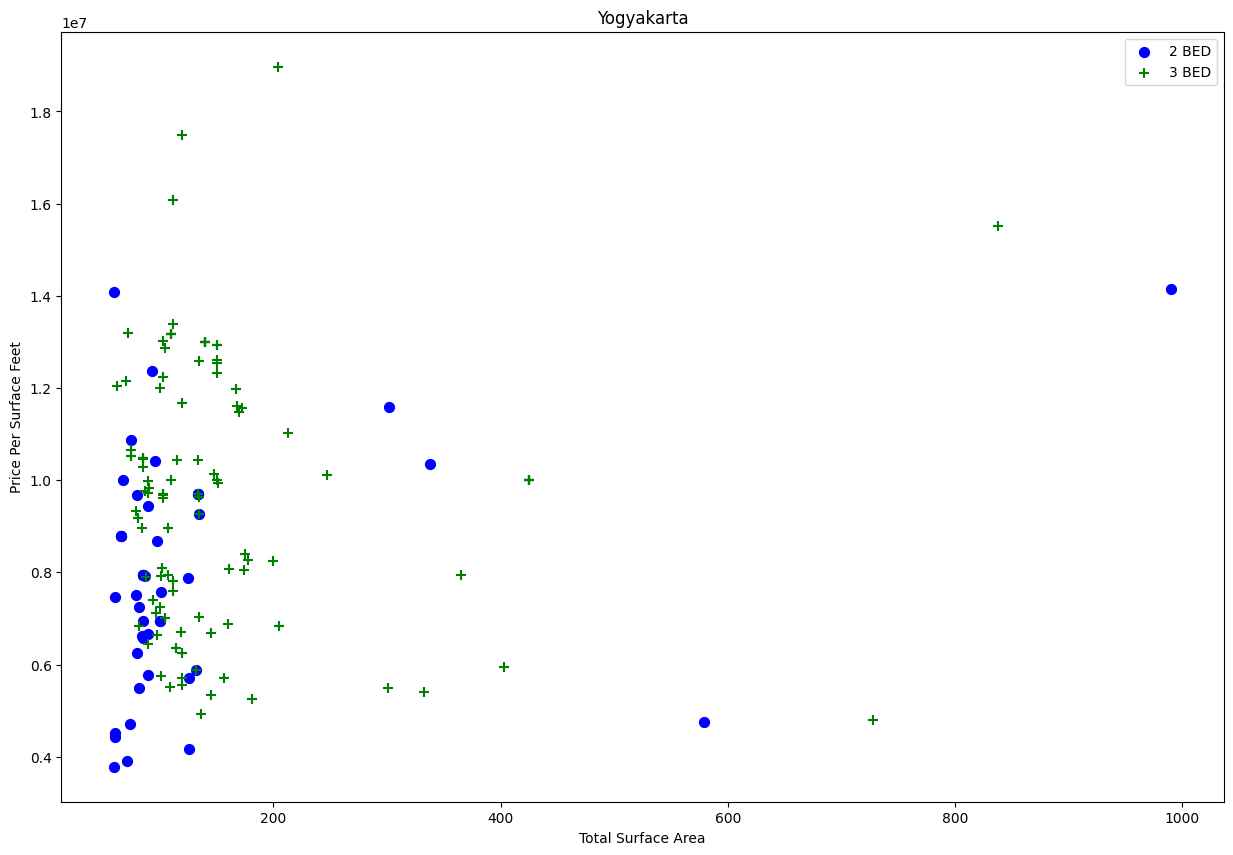

In [40]:
plot_scatter_chart(df3,'Yogyakarta')

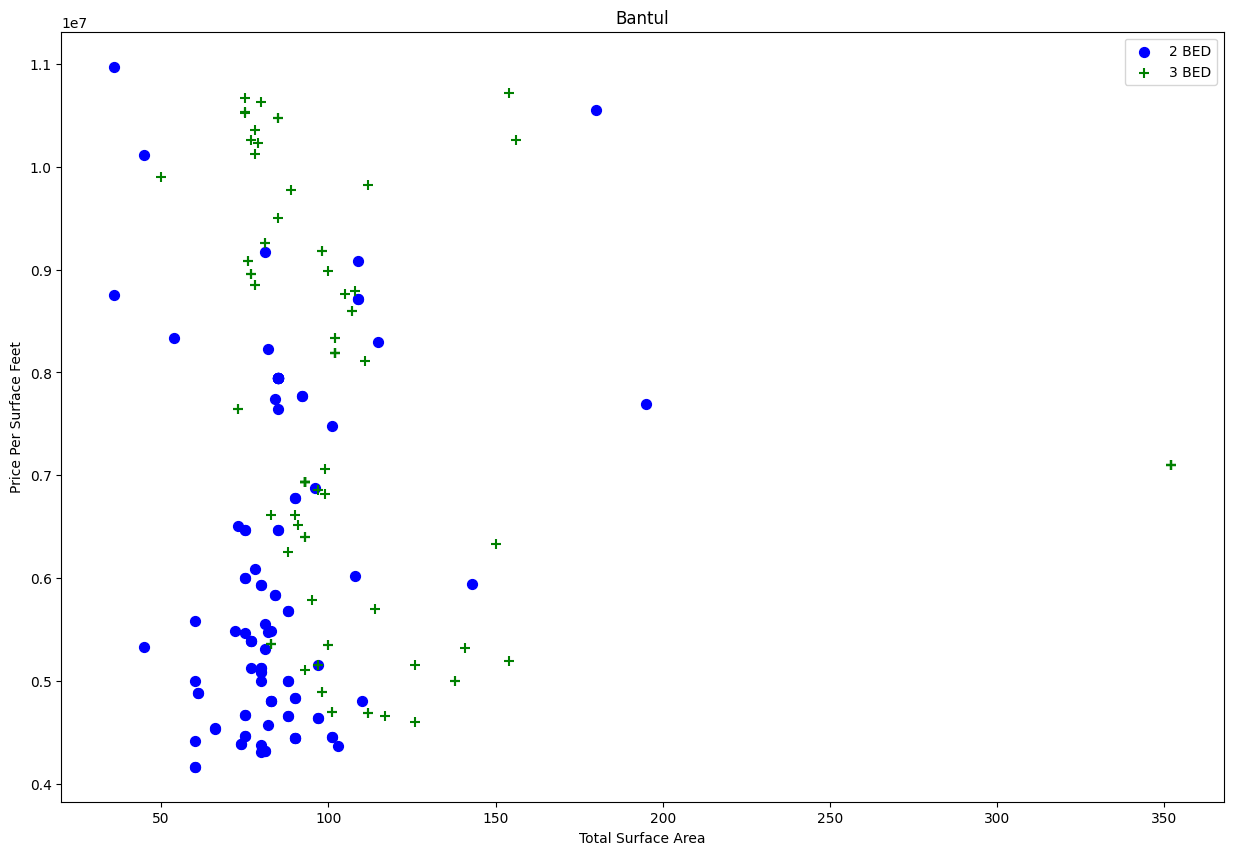

In [41]:
plot_scatter_chart(df3,'Bantul')

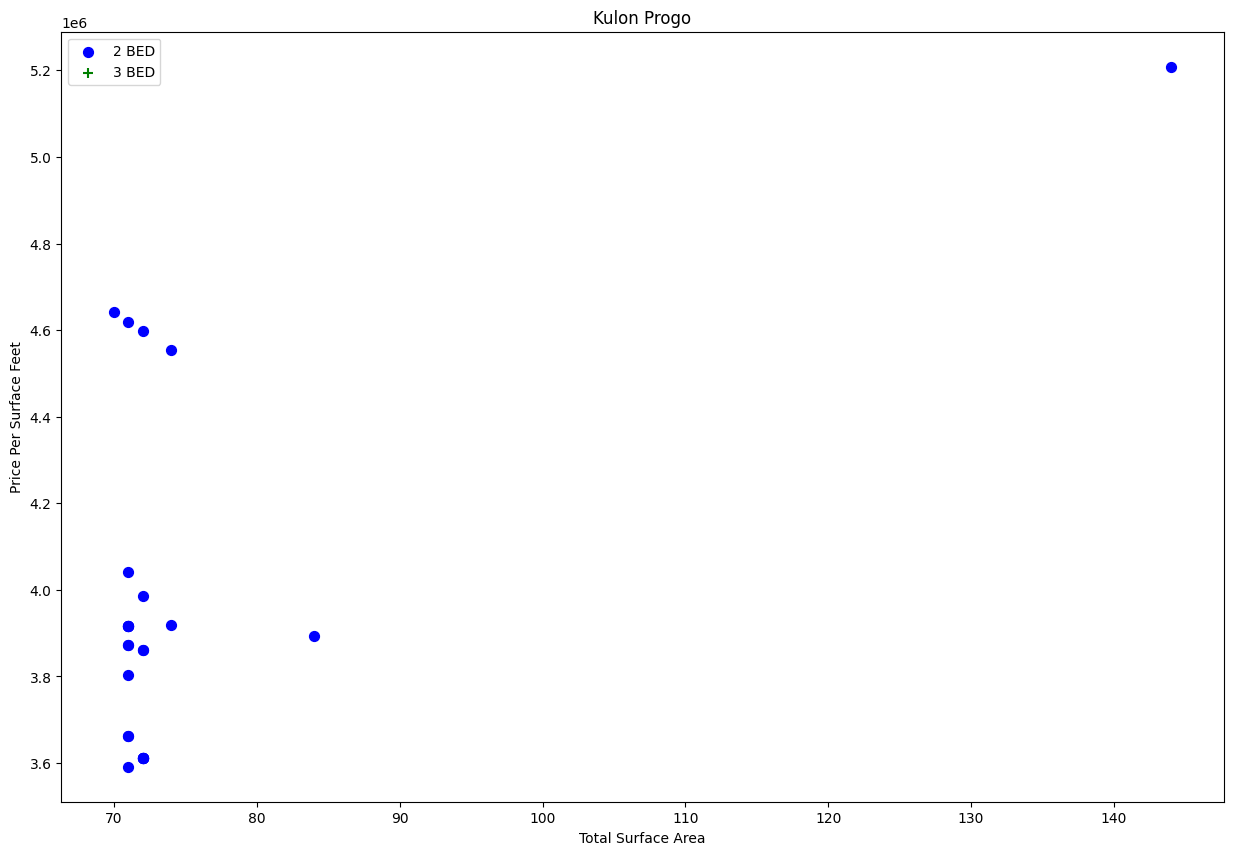

In [42]:
plot_scatter_chart(df3,'Kulon Progo')

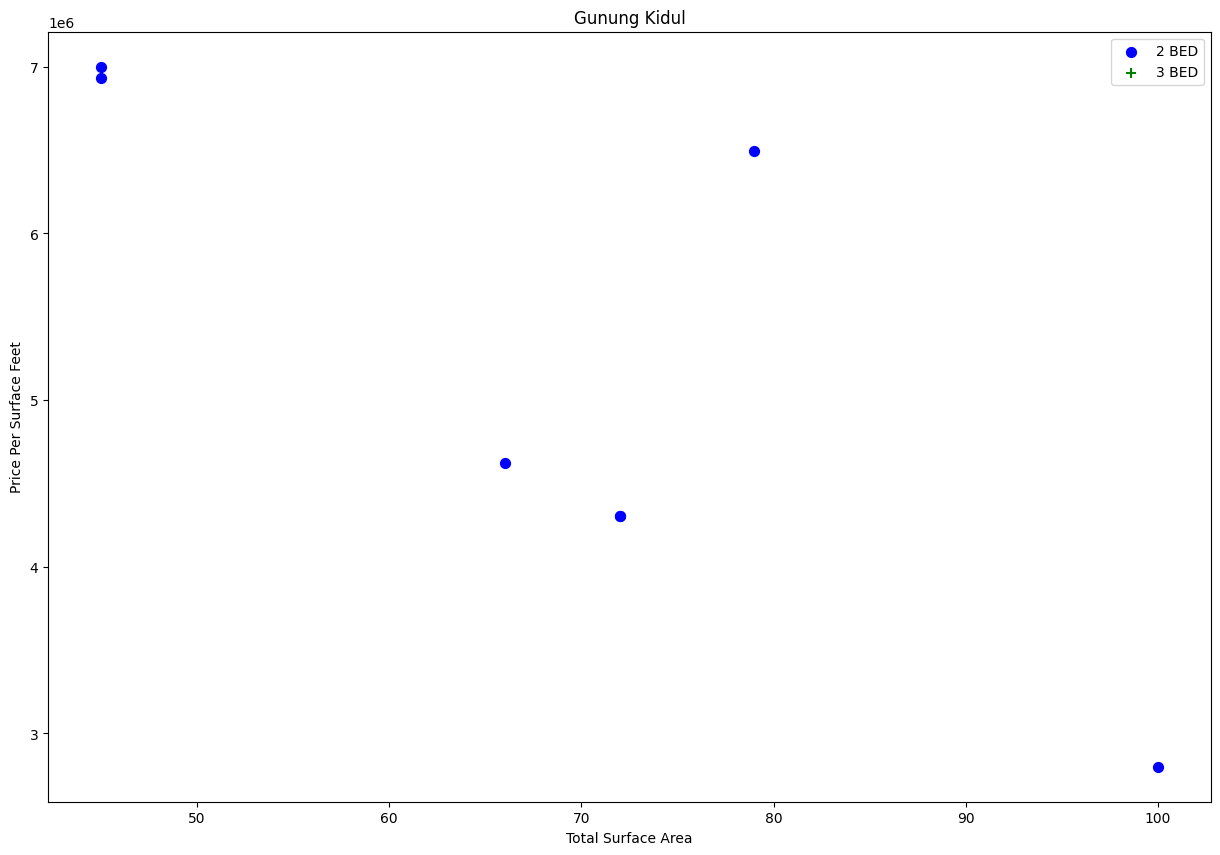

In [43]:
plot_scatter_chart(df3,'Gunung Kidul')

In [44]:
def remove_bed_outliners(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bed_stats = {}
        for bed, bed_df in location_df.groupby('bed'):
            bed_stats[bed] = {
                'mean': np.mean(bed_df.price_per_surface),
                'std': np.std(bed_df.price_per_surface),
                'count': bed_df.shape[0]
            }
        for bed, bed_df in location_df.groupby('bed'):
            stats = bed_stats.get(bed-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bed_df[bed_df.price_per_surface<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df4 = remove_bed_outliners(df3)
df4.shape

(1112, 7)

Text(0, 0.5, 'Count')

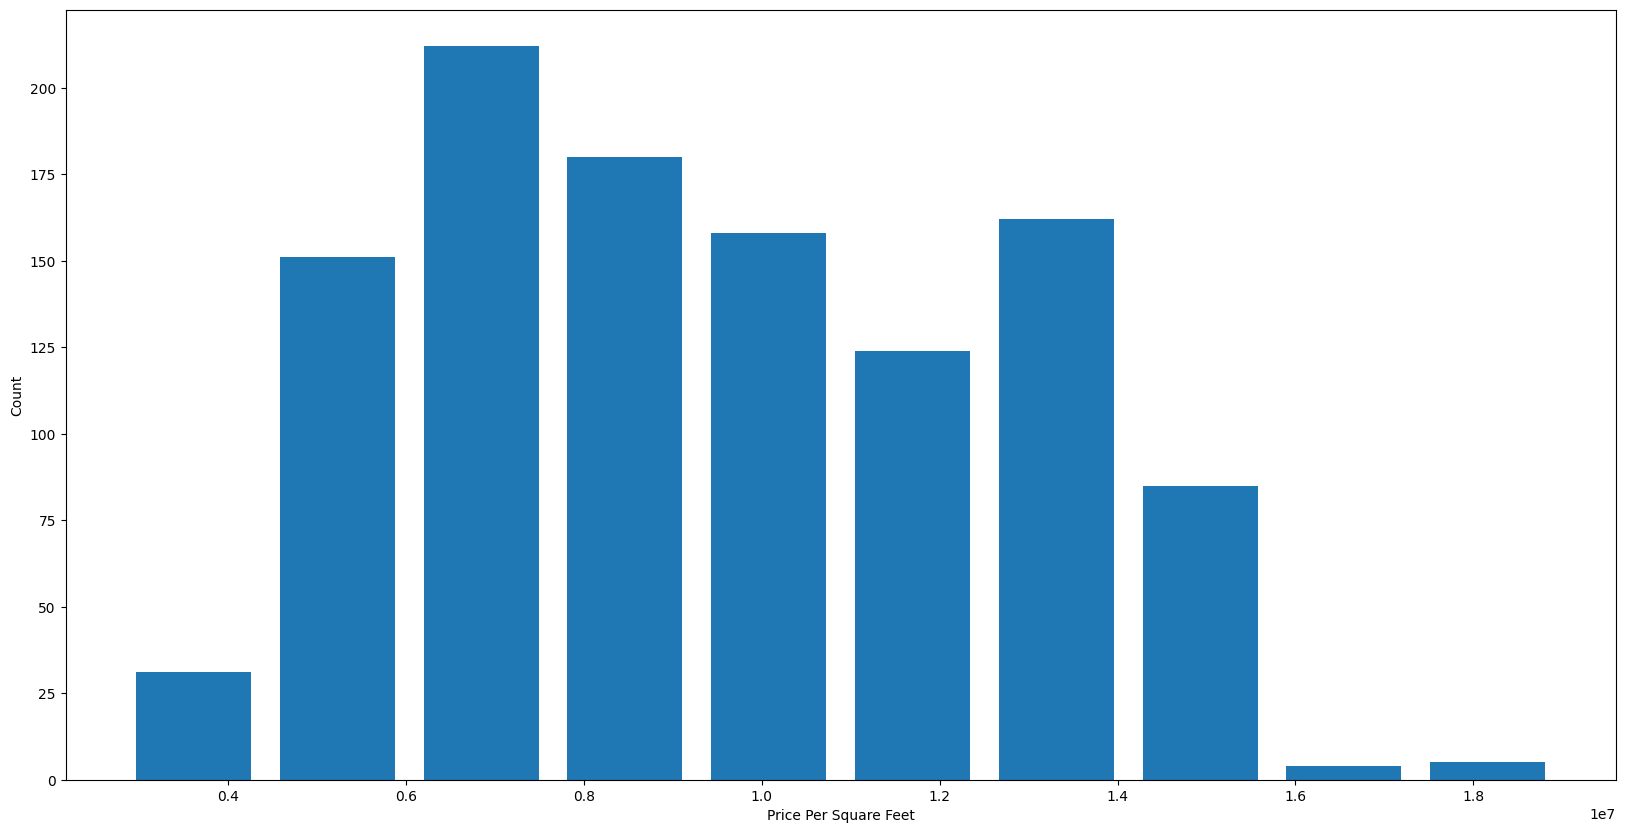

In [45]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df4.price_per_surface, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')


In [46]:
df4.bath.unique()

array([ 1,  2,  3,  5,  4, 12, 11,  7, 14,  6, 10,  8, 15, 20, 28, 16, 13,
       47,  9, 22, 49, 30], dtype=int64)

In [47]:
df4[df4.bath > 10]

,price,listing-location,bed,bath,surface_area,location,price_per_surface
77,1400000000,"Sewon, Bantul",12,12,150.0,Bantul,9.333333e+06
78,2300000000,"Banguntapan, Bantul",11,11,562.0,Bantul,4.092527e+06
286,2000000000,"Depok, Sleman",14,14,196.0,Sleman,1.020408e+07
363,3900000000,"Ngaglik, Sleman",14,14,502.0,Sleman,7.768924e+06
450,2950000000,"Depok, Sleman",15,15,200.0,Sleman,1.475000e+07
457,2880000000,"Sleman, Sleman",11,11,207.0,Sleman,1.391304e+07
590,1800000000,"Depok, Sleman",20,20,217.0,Sleman,8.294931e+06
592,10500000000,"Condong Catur, Sleman",26,28,1000.0,Sleman,1.050000e+07
611,1950000000,"Ngaglik, Sleman",11,11,150.0,Sleman,1.300000e+07
638,6850000000,"Caturtunggal, Sleman",16,16,866.0,Sleman,7.909931e+06


In [48]:
# gada data yg bath lebih dr bed+2, berarti gada outlier
df4[df4.bath>df4.bed+2]

,price,listing-location,bed,bath,surface_area,location,price_per_surface


In [49]:
df5 = df4[df4.bath<df4.bed+2]
df5.shape


(1110, 7)

In [50]:
df6 = df5.drop(['price_per_surface'], axis='columns')
df6.head()

,price,listing-location,bed,bath,surface_area,location
0,300000000,"Sedayu, Bantul",2,1,60.0,Bantul
1,900000000,"Kasihan, Bantul",3,2,111.0,Bantul
2,450000000,"Plered, Bantul",2,1,97.0,Bantul
3,2500000000,"Kasihan, Bantul",3,3,352.0,Bantul
4,2500000000,"Kasihan, Bantul",3,3,352.0,Bantul


In [51]:
dummies = pd.get_dummies(df6.location)
dummies.head(10)

,Bantul,Gunung Kidul,Kulon Progo,Sleman,Yogyakarta
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
5,True,False,False,False,False
6,True,False,False,False,False
7,True,False,False,False,False
8,True,False,False,False,False
9,True,False,False,False,False


In [52]:
df7 = pd.concat([df6,dummies], axis='columns')
df7.head()

,price,listing-location,bed,bath,surface_area,location,Bantul,Gunung Kidul,Kulon Progo,Sleman,Yogyakarta
0,300000000,"Sedayu, Bantul",2,1,60.0,Bantul,True,False,False,False,False
1,900000000,"Kasihan, Bantul",3,2,111.0,Bantul,True,False,False,False,False
2,450000000,"Plered, Bantul",2,1,97.0,Bantul,True,False,False,False,False
3,2500000000,"Kasihan, Bantul",3,3,352.0,Bantul,True,False,False,False,False
4,2500000000,"Kasihan, Bantul",3,3,352.0,Bantul,True,False,False,False,False


In [53]:
df8 = df7.drop(['listing-location','location'], axis='columns')
df8.head()

,price,bed,bath,surface_area,Bantul,Gunung Kidul,Kulon Progo,Sleman,Yogyakarta
0,300000000,2,1,60.0,True,False,False,False,False
1,900000000,3,2,111.0,True,False,False,False,False
2,450000000,2,1,97.0,True,False,False,False,False
3,2500000000,3,3,352.0,True,False,False,False,False
4,2500000000,3,3,352.0,True,False,False,False,False


In [54]:
df8.shape

(1110, 9)

In [55]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 0 to 1501
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1110 non-null   int64  
 1   bed           1110 non-null   int64  
 2   bath          1110 non-null   int64  
 3   surface_area  1110 non-null   float64
 4   Bantul        1110 non-null   bool   
 5   Gunung Kidul  1110 non-null   bool   
 6   Kulon Progo   1110 non-null   bool   
 7   Sleman        1110 non-null   bool   
 8   Yogyakarta    1110 non-null   bool   
dtypes: bool(5), float64(1), int64(3)
memory usage: 48.8 KB


In [56]:
df8.to_csv('final.csv', index=False)

In [57]:
X = df8.drop(['price'], axis='columns')
X.head()

,bed,bath,surface_area,Bantul,Gunung Kidul,Kulon Progo,Sleman,Yogyakarta
0,2,1,60.0,True,False,False,False,False
1,3,2,111.0,True,False,False,False,False
2,2,1,97.0,True,False,False,False,False
3,3,3,352.0,True,False,False,False,False
4,3,3,352.0,True,False,False,False,False


In [58]:
Y = df8.price
Y.head()

0     300000000
1     900000000
2     450000000
3    2500000000
4    2500000000
Name: price, dtype: int64

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Scaling fitur numerik
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Model Linear Regression
# lr_clf = LinearRegression()
# lr_clf.fit(X_train_scaled, y_train)

# # Evaluasi model
# score = lr_clf.score(X_test_scaled, y_test)

# print("R-squared Score (akurasi):", score)

R-squared Score (akurasi): 0.7427422222826948


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_clf = LinearRegression()
lr_clf.fit(X_train_scaled, y_train)
print("Linear Regression R-squared:", lr_clf.score(X_test_scaled, y_test))

# Lasso Regression
lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X_train_scaled, y_train)
print("Lasso Regression R-squared:", lasso_clf.score(X_test_scaled, y_test))

# Decision Tree Regressor
dt_clf = DecisionTreeRegressor(criterion='squared_error', splitter='best')
dt_clf.fit(X_train_scaled, y_train)
print("Decision Tree R-squared:", dt_clf.score(X_test_scaled, y_test))

# Random Forest Regressor
rf_clf = RandomForestRegressor(n_estimators=100, criterion='squared_error')
rf_clf.fit(X_train_scaled, y_train)
print("Random Forest R-squared:", rf_clf.score(X_test_scaled, y_test))

# XGBoost Regressor
xgb_clf = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_clf.fit(X_train_scaled, y_train)
print("XGBoost R-squared:", xgb_clf.score(X_test_scaled, y_test))

Linear Regression R-squared: 0.7427422222826948
Lasso Regression R-squared: 0.7427422223409454
Decision Tree R-squared: 0.7048604407243056
Random Forest R-squared: 0.8172950603968506
XGBoost R-squared: 0.8214117288589478


In [123]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.83203295, 0.85165196, 0.78198399, 0.7842465 , 0.78041278])

In [124]:
def find_best_model(X, y):
    alg = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['squared_error', 'absolute_error']
            }
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        },
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for alg_name, config in alg.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': alg_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model(X, Y)


c:\Users\MHIKAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+20, tolerance: 2.281e+17
  model = cd_fast.enet_coordinate_descent(
c:\Users\MHIKAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+20, tolerance: 1.702e+17
  model = cd_fast.enet_coordinate_descent(
c:\Users\MHIKAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

,model,best_score,best_params
0,linear_regression,0.806066,"{'copy_X': True, 'fit_intercept': False}"
1,lasso,0.806066,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.752672,"{'criterion': 'squared_error', 'splitter': 'be..."
3,random_forest,0.848093,"{'criterion': 'absolute_error', 'n_estimators'..."
4,XGBoost,0.855584,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


In [ ]:
# def predict_price(location,surface_area,bath,bed):
#     locIndex = np.where(X.columns==location)[0][0] if location in X.columns else -1
    
#     x = np.zeros(len(X.columns))
#     x[0] = surface_area
#     x[1] = bath
#     x[2] = bed
#     if locIndex >= 0:
#         x[locIndex] = 1
        
#     return lr_clf.predict([x])[0]

In [ ]:
# def predict_price(location, surface_area, bath, bed):
#     try:
#         locIndex = np.where(X.columns == location)[0][0]
#     except IndexError:
#         print(f"Lokasi '{location}' tidak ditemukan dalam data training. Pastikan lokasinya benar!")
#         return None

#     x = np.zeros(len(X.columns))
#     x[0] = surface_area
#     x[1] = bath
#     x[2] = bed

#     if locIndex >= 0:
#         x[locIndex] = 1

#     return lr_clf.predict([x])[0]

In [ ]:
def predict_price(location, surface_area, bath, bed, model_name='linear_regression'):
    try:
        locIndex = np.where(X.columns == location)[0][0]
    except IndexError:
        print(f"Lokasi '{location}' tidak ditemukan dalam data training. Pastikan lokasinya benar!")
        return None

    x = np.zeros(len(X.columns))
    x[0] = surface_area
    x[1] = bath
    x[2] = bed

    if locIndex >= 0:
        x[locIndex] = 1

    x_scaled = scaler.transform([x])

    if model_name == 'linear_regression':
        model = lr_clf
    elif model_name == 'lasso':
        model = lasso_clf
    elif model_name == 'decision_tree':
        model = dt_clf
    elif model_name == 'random_forest':
        model = rf_clf
    elif model_name == 'XGBoost':
        model = xgb_clf
    else:
        print(f"Model '{model_name}' tidak ditemukan. Pilih antara: 'linear_regression', 'lasso', 'decision_tree', 'random_forest', atau 'XGBoost'.")
        return None

    return model.predict(x_scaled)[0]


In [127]:
X.columns

Index(['bed', 'bath', 'surface_area', 'Bantul', 'Gunung Kidul', 'Kulon Progo',
       'Sleman', 'Yogyakarta'],
      dtype='object')

In [163]:
predict_price('Yogyakarta', 140, 3, 3, 'XGBoost')

c:\Users\MHIKAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


746310300.0